##### CSCI 303
# Introduction to Data Science
<p/>
### Neural Networks Playground - MLP Example

## Chemical Analysis of Wine Recognition Dataset
---
- https://archive.ics.uci.edu/ml/datasets/Wine 
- Data is the result of chemical analysis of wines grown in the same reagion in Italy (different cultivar/grape variety)
- Used in a many research papers including comparisons of classifiers and performance evaluations
- 178 rows or data observations, 13 columns or attributs, 3 classes

More Free DataSets:
- https://www.springboard.com/blog/free-public-data-sets-data-science-project/

In [1]:
#Start with all of our includes needed below
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Import the provided dataset into a pandas dataframe
dataFile = 'wine_data.csv'
data = pd.read_csv(dataFile, names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [3]:
#We can also print out the shape to confirm number of observations and features
print(data.shape)

#Print out the first 5 rows to see what we have (change parameter to see more)
data.head()

(178, 14)


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#View some statistics on our data
data.describe()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
#Notice our targets are the 1st column, split that into X and y before doing learning with it
#When bulding X, we need to get rid of the targets, the axis param tells the drop function to use a column label
targetLabel='Cultivator'
X = data.drop(targetLabel,axis=1)
y = data[targetLabel]

In [6]:
#We are doing supervised Machine Learning, so let's split our data before moving on
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
#Since our model is sensitive to the variability within the feature data
#Recall, we normalized our data in the clustering project to keep the feature data within a common range
#Now we will experiment with the other mentioned scaling technique: standardize the data to have a zero mean and unit standard deviation
scaler = StandardScaler()

#Fit to the training data, this will compute the mean and std to be used for scaling
scaler.fit(X_train)

#Next, we want to apply the above transformations to the feature data (training and test sets)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

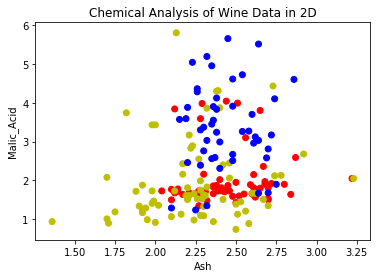

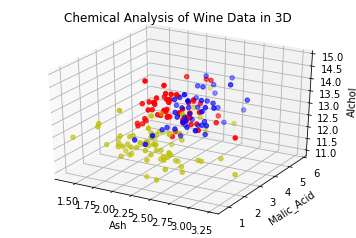

In [8]:
#See if we can plot (in 2D or 3D some of the data ... just for grins)

#Setup a colormap (or remove that argument to use the defaults)
cmap = ListedColormap(['r', 'y','b'])

#Setup some variables so we don't have to retype them below each time we want to change a feature to plot
viewFeature1 = 'Ash'
viewFeature2 = 'Malic_Acid'
vewFeature3 = 'Alchol'

#Create a new plot object, send in two features for scatter plot and color code with y values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[viewFeature1], X[viewFeature2], c=y, cmap=cmap)
#Adding title and labels before displaying the plot to the screen
ax.set_title('Chemical Analysis of Wine Data in 2D')
ax.set_xlabel(viewFeature1)
ax.set_ylabel(viewFeature2)
plt.show()

#Create a new plot object, send in three features for scatter plot and color code with y values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[viewFeature1], X[viewFeature2], X[vewFeature3], c=y, cmap=cmap)
#Adding title and labels before displaying the plot to the screen
ax.set_title('Chemical Analysis of Wine Data in 3D')
ax.set_xlabel(viewFeature1)
ax.set_ylabel(viewFeature2)
ax.set_zlabel(vewFeature3)
plt.show()

## Multi-layer Perceptron Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [9]:
#Continuing with our workflow ... we create a model object for a MLP Classifer from sci-kit learn (see link above)
#There are many parameters you can look at ... the two parameters we set here areL:
#1. hidden_layer_sizes (number of neurons in each hidden layer - the below specifices 3 hidden layers each with 13 neurons)
#2. max_iter (the model will continue iterating until it converges or hits this number of iterations)
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [10]:
#Train our model (look familiar? Yes, it should ... .fit() with our training data)
#Notice the output of this line is the MLP object information - see the activation function is relu
#We could switch that to the sigmoid by specifying it as a parameter to MLPClassifier() (e.g., activation='logistic') 
#when we create the MLP model object above - try it and re-run the experiment (see if you get a better result)
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
#Now that our model is trained, call our .predict() with the test data to make predictions, y_yat
y_hat = mlp.predict(X_test)

In [12]:
#Now Evaluate our results by comparing y and y_hat, again using the test data
print(confusion_matrix(y_test,y_hat))
print(classification_report(y_test,y_hat))

[[15  0  0]
 [ 0 17  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        15
          2       0.89      1.00      0.94        17
          3       1.00      0.85      0.92        13

avg / total       0.96      0.96      0.95        45



In [13]:
#We can also get information out of the classifier, for example, you can print the activation function used
print(mlp.activation)

#You can also get vectors that hold the weights (coefs_[0] holds the weights between layer 0 and 1)
#print(mlp.coefs_[0])

#The bias terms in intercepts_[0] hold the bias values added to layer 1
print(mlp.intercepts_[0])

#Try some more ... type mlp. and press the tab key

relu
[ 0.4232956  -0.13114695  0.10608971  0.39287909 -0.26806776 -0.26524251
 -0.01132359  0.39244577  0.34483624  0.50826234  0.24285628  0.39579481
 -0.35473986]
